In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

workding_dir = str(Path.cwd().parent)
os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/novel-translation


In [3]:
from translation_utils import *

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
import pandas as pd

df = pd.read_csv("results/mac-results-mistral.csv")

In [5]:
df.head()

,chinese,english,unsloth/Qwen2-0.5B-Instruct,unsloth/Qwen2-0.5B-Instruct(finetuned),unsloth/Qwen2-1.5B-Instruct,unsloth/Qwen2-1.5B-Instruct(finetuned),unsloth/Qwen2-7B-Instruct-bnb-4bit,unsloth/Qwen2-7B-Instruct-bnb-4bit(finetuned),gradientai/Llama-3-8B-Instruct-Gradient-1048k,gradientai/Llama-3-8B-Instruct-Gradient-1048k(finetuned),unsloth/mistral-7b-instruct-v0.3,unsloth/mistral-7b-instruct-v0.3(finetuned)
0,老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...,"Old Geng picked up his shotgun, squinted, and ...","Old Tang held his gun, squinting his eyes with...",Old Geng lifted his rifle and narrowed his eye...,"Old Geng took up his gun, squinted one of its ...","Old Geng raised the rifle, squeezed one tiny t...","Old Geng raised his gun, squinting one of his ...",Old Geng raised his rifle and squinted into on...,"Old Geng raised his gun, squinted through one ...","Old Geng raised his rifle, squinted through on...","Geng Da initiates firing, squinting to form a ...","Old Geng aimed, blinked once, and fired. His s..."
1,次日天未明时，刘老老便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...,Next day Grannie Liu was up before dawn. As so...,"The next morning when it was still dark, Liu G...",It was still not light when this little update...,"By the time the next day dawned, Liu Lao got u...","Having been woken just before daybreak, Granni...","The next morning, before dawn, Old Liu rose to...",First thing next morning Grannie Liu rose earl...,"The next day, when it was still dark, Liu Lao ...",Next morning before daybreak Liu Old colouring...,"The next day, when it was still dark, Liu Lao ...","As soon as it was daylight, Grannie Liu got up..."
2,钱老板道：“是，是，多谢香主。” 在一张椅上坐了，续道：“属下将小郡主藏在猪肚里带进宫来，一...,"'Thank you, Master,' said Butcher Qian, seatin...","Qian Shou said, “Yes, yes, thank you very much...","Yes, sir,' said Butcher Qian and sat down at t...","Mr. Qian said, ""Yes, yes, thank you very much....","Please, Master, thank you,' said the butcher. ...","Money Master said, ""Yes, yes, thank you for yo...","Yes, Goong-goong, ' said Butcher Qian, and sat...","The money boss said: ""Is that so? Thank you, m...","'Of course,' said Butcher Qian, sitting himsel...","The boss said, ""Yes, yes, thank you, Madam. Si...","Thank you, Master,' said Butcher Qian, and he ..."
3,但已经晚了，物理学家静静地躺在地上，半睁的双眼看着从他的头颅上流出的血迹，疯狂的会场瞬间陷入...,But it was already too late. The physicist lay...,But it was too late; the physicist lay still o...,But already then he was too late. The physical...,But it was too late. Physicists lay quietly on...,It was too late. The physics professor lay on ...,But it was too late. The physicist lay quietly...,But it was too late. The physicist lay on the ...,But it was already too late. The physicist lay...,But it was too late. The physicist lay quietly...,"The text is: ""But it's too late, the physicist...",But it was already too late. The physicist lay...
4,但这时，绍琳却做出了一件出人意料的事，与一位受迫害的教育部高干结了婚，当时那名高干还在干校住...,But then Shao did something that no one expect...,"But then, Song Lin made a surprising move by m...",But just then Shao Lin made a surprising turn....,"But at this time, Su Ling made a surprising mo...","But suddenly, Shao Lin made a decision that we...","But at this point, Shao Lin did something unex...",But then Shao Lin unexpectedly did something n...,"However, Shao Lin did something unexpected at ...","However, this was not at all what anyone expec...",Shao Lin surprisingly married a high-ranking o...,But then Shao Lin did something unexpected. Sh...


In [6]:
df2 = pd.read_csv("results/experiment-2-results.csv")

In [7]:
df2.head()

,chinese,english,unsloth/Qwen2-0.5B-Instruct,unsloth/Qwen2-0.5B-Instruct(finetuned),unsloth/Qwen2-1.5B-Instruct,unsloth/Qwen2-1.5B-Instruct(finetuned),unsloth/Qwen2-7B-Instruct,unsloth/Qwen2-7B-Instruct(finetuned),gradientai/Llama-3-8B-Instruct-Gradient-1048k,gradientai/Llama-3-8B-Instruct-Gradient-1048k(finetuned)
0,老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...,"Old Geng picked up his shotgun, squinted, and ...","Old Tang held his gun, squinting his eyes with...",Old Geng lifted his rifle and narrowed his eye...,"Old Geng took up his gun, squinted one of its ...","Old Geng raised the rifle, squeezed one tiny t...","Old Aigang raised his rifle, squinting one of ...",Old Geng raised his rifle and squinted into th...,"Old Geng raised his gun, squinted through one ...","Old Geng raised his rifle, squinted through on..."
1,次日天未明时，刘老老便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...,Next day Grannie Liu was up before dawn. As so...,"The next morning when it was still dark, Liu G...",It was still not light when this little update...,"By the time the next day dawned, Liu Lao got u...","Having been woken just before daybreak, Granni...","The next morning, before dawn, Old Liu rose to...",First thing next morning Grannie Liu rose befo...,"The next day, when it was still dark, Liu Lao ...","Next morning, long before daybreak, Grannie Li..."
2,钱老板道：“是，是，多谢香主。” 在一张椅上坐了，续道：“属下将小郡主藏在猪肚里带进宫来，一...,"'Thank you, Master,' said Butcher Qian, seatin...","Qian Shou said, “Yes, yes, thank you very much...","Yes, sir,' said Butcher Qian and sat down at t...","Mr. Qian said, ""Yes, yes, thank you very much....","Please, Master, thank you,' said the butcher. ...","Mr. Qian said, ""Yes, yes, thank you for your c...","Yes, Goong-goong, yes,' said Butcher Qian, sit...","The money boss said: ""Is that so? Thank you, m...","'Oh no, Master,'said Butcher Qian, sitting him..."
3,但已经晚了，物理学家静静地躺在地上，半睁的双眼看着从他的头颅上流出的血迹，疯狂的会场瞬间陷入...,But it was already too late. The physicist lay...,But it was too late; the physicist lay still o...,But already then he was too late. The physical...,But it was too late. Physicists lay quietly on...,It was too late. The physics professor lay on ...,But it was too late. The physicist lay quietly...,But it was too late. The physicist lay on the ...,But it was already too late. The physicist lay...,But it was too late. The physicist lay on the ...
4,但这时，绍琳却做出了一件出人意料的事，与一位受迫害的教育部高干结了婚，当时那名高干还在干校住...,But then Shao did something that no one expect...,"But then, Song Lin made a surprising move by m...",But just then Shao Lin made a surprising turn....,"But at this time, Su Ling made a surprising mo...","But suddenly, Shao Lin made a decision that we...","But at this point, Shaolin did something unexp...",But then Shao made a surprise decision: she ma...,"However, Shao Lin did something unexpected at ...",But then she did something no one saw coming: ...


In [8]:
df2["unsloth/mistral-7b-instruct-v0.3"] = df["unsloth/mistral-7b-instruct-v0.3"]
df2["unsloth/mistral-7b-instruct-v0.3(finetuned)"] = df[
    "unsloth/mistral-7b-instruct-v0.3(finetuned)"
]

In [9]:
df2.head()

,chinese,english,unsloth/Qwen2-0.5B-Instruct,unsloth/Qwen2-0.5B-Instruct(finetuned),unsloth/Qwen2-1.5B-Instruct,unsloth/Qwen2-1.5B-Instruct(finetuned),unsloth/Qwen2-7B-Instruct,unsloth/Qwen2-7B-Instruct(finetuned),gradientai/Llama-3-8B-Instruct-Gradient-1048k,gradientai/Llama-3-8B-Instruct-Gradient-1048k(finetuned),unsloth/mistral-7b-instruct-v0.3,unsloth/mistral-7b-instruct-v0.3(finetuned)
0,老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...,"Old Geng picked up his shotgun, squinted, and ...","Old Tang held his gun, squinting his eyes with...",Old Geng lifted his rifle and narrowed his eye...,"Old Geng took up his gun, squinted one of its ...","Old Geng raised the rifle, squeezed one tiny t...","Old Aigang raised his rifle, squinting one of ...",Old Geng raised his rifle and squinted into th...,"Old Geng raised his gun, squinted through one ...","Old Geng raised his rifle, squinted through on...","Geng Da initiates firing, squinting to form a ...","Old Geng aimed, blinked once, and fired. His s..."
1,次日天未明时，刘老老便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...,Next day Grannie Liu was up before dawn. As so...,"The next morning when it was still dark, Liu G...",It was still not light when this little update...,"By the time the next day dawned, Liu Lao got u...","Having been woken just before daybreak, Granni...","The next morning, before dawn, Old Liu rose to...",First thing next morning Grannie Liu rose befo...,"The next day, when it was still dark, Liu Lao ...","Next morning, long before daybreak, Grannie Li...","The next day, when it was still dark, Liu Lao ...","As soon as it was daylight, Grannie Liu got up..."
2,钱老板道：“是，是，多谢香主。” 在一张椅上坐了，续道：“属下将小郡主藏在猪肚里带进宫来，一...,"'Thank you, Master,' said Butcher Qian, seatin...","Qian Shou said, “Yes, yes, thank you very much...","Yes, sir,' said Butcher Qian and sat down at t...","Mr. Qian said, ""Yes, yes, thank you very much....","Please, Master, thank you,' said the butcher. ...","Mr. Qian said, ""Yes, yes, thank you for your c...","Yes, Goong-goong, yes,' said Butcher Qian, sit...","The money boss said: ""Is that so? Thank you, m...","'Oh no, Master,'said Butcher Qian, sitting him...","The boss said, ""Yes, yes, thank you, Madam. Si...","Thank you, Master,' said Butcher Qian, and he ..."
3,但已经晚了，物理学家静静地躺在地上，半睁的双眼看着从他的头颅上流出的血迹，疯狂的会场瞬间陷入...,But it was already too late. The physicist lay...,But it was too late; the physicist lay still o...,But already then he was too late. The physical...,But it was too late. Physicists lay quietly on...,It was too late. The physics professor lay on ...,But it was too late. The physicist lay quietly...,But it was too late. The physicist lay on the ...,But it was already too late. The physicist lay...,But it was too late. The physicist lay on the ...,"The text is: ""But it's too late, the physicist...",But it was already too late. The physicist lay...
4,但这时，绍琳却做出了一件出人意料的事，与一位受迫害的教育部高干结了婚，当时那名高干还在干校住...,But then Shao did something that no one expect...,"But then, Song Lin made a surprising move by m...",But just then Shao Lin made a surprising turn....,"But at this time, Su Ling made a surprising mo...","But suddenly, Shao Lin made a decision that we...","But at this point, Shaolin did something unexp...",But then Shao made a surprise decision: she ma...,"However, Shao Lin did something unexpected at ...",But then she did something no one saw coming: ...,Shao Lin surprisingly married a high-ranking o...,But then Shao Lin did something unexpected. Sh...


In [10]:
df2.columns.to_list()

['chinese',
 'english',
 'unsloth/Qwen2-0.5B-Instruct',
 'unsloth/Qwen2-0.5B-Instruct(finetuned)',
 'unsloth/Qwen2-1.5B-Instruct',
 'unsloth/Qwen2-1.5B-Instruct(finetuned)',
 'unsloth/Qwen2-7B-Instruct',
 'unsloth/Qwen2-7B-Instruct(finetuned)',
 'gradientai/Llama-3-8B-Instruct-Gradient-1048k',
 'gradientai/Llama-3-8B-Instruct-Gradient-1048k(finetuned)',
 'unsloth/mistral-7b-instruct-v0.3',
 'unsloth/mistral-7b-instruct-v0.3(finetuned)']

In [11]:
df2.columns = [
    "chinese",
    "english",
    "unsloth/Qwen2-0.5B-Instruct",
    "unsloth/Qwen2-0.5B-Instruct(finetuned)",
    "unsloth/Qwen2-1.5B-Instruct",
    "unsloth/Qwen2-1.5B-Instruct(finetuned)",
    "unsloth/Qwen2-7B-Instruct",
    "unsloth/Qwen2-7B-Instruct(finetuned)",
    "unsloth/mistral-7b-instruct-v0.3",
    "unsloth/mistral-7b-instruct-v0.3(finetuned)",
    "gradientai/Llama-3-8B-Instruct-Gradient-1048k",
    "gradientai/Llama-3-8B-Instruct-Gradient-1048k(finetuned)",
]

In [12]:
df2.head()

,chinese,english,unsloth/Qwen2-0.5B-Instruct,unsloth/Qwen2-0.5B-Instruct(finetuned),unsloth/Qwen2-1.5B-Instruct,unsloth/Qwen2-1.5B-Instruct(finetuned),unsloth/Qwen2-7B-Instruct,unsloth/Qwen2-7B-Instruct(finetuned),unsloth/mistral-7b-instruct-v0.3,unsloth/mistral-7b-instruct-v0.3(finetuned),gradientai/Llama-3-8B-Instruct-Gradient-1048k,gradientai/Llama-3-8B-Instruct-Gradient-1048k(finetuned)
0,老耿端起枪，眯缝起一只三角眼，一搂扳机响了枪，冰雹般的金麻雀劈哩啪啦往下落，铁砂子在柳枝间飞...,"Old Geng picked up his shotgun, squinted, and ...","Old Tang held his gun, squinting his eyes with...",Old Geng lifted his rifle and narrowed his eye...,"Old Geng took up his gun, squinted one of its ...","Old Geng raised the rifle, squeezed one tiny t...","Old Aigang raised his rifle, squinting one of ...",Old Geng raised his rifle and squinted into th...,"Old Geng raised his gun, squinted through one ...","Old Geng raised his rifle, squinted through on...","Geng Da initiates firing, squinting to form a ...","Old Geng aimed, blinked once, and fired. His s..."
1,次日天未明时，刘老老便起来梳洗了， 又将板儿教了几句话； 五六岁的孩子，听见带了他进城逛去，...,Next day Grannie Liu was up before dawn. As so...,"The next morning when it was still dark, Liu G...",It was still not light when this little update...,"By the time the next day dawned, Liu Lao got u...","Having been woken just before daybreak, Granni...","The next morning, before dawn, Old Liu rose to...",First thing next morning Grannie Liu rose befo...,"The next day, when it was still dark, Liu Lao ...","Next morning, long before daybreak, Grannie Li...","The next day, when it was still dark, Liu Lao ...","As soon as it was daylight, Grannie Liu got up..."
2,钱老板道：“是，是，多谢香主。” 在一张椅上坐了，续道：“属下将小郡主藏在猪肚里带进宫来，一...,"'Thank you, Master,' said Butcher Qian, seatin...","Qian Shou said, “Yes, yes, thank you very much...","Yes, sir,' said Butcher Qian and sat down at t...","Mr. Qian said, ""Yes, yes, thank you very much....","Please, Master, thank you,' said the butcher. ...","Mr. Qian said, ""Yes, yes, thank you for your c...","Yes, Goong-goong, yes,' said Butcher Qian, sit...","The money boss said: ""Is that so? Thank you, m...","'Oh no, Master,'said Butcher Qian, sitting him...","The boss said, ""Yes, yes, thank you, Madam. Si...","Thank you, Master,' said Butcher Qian, and he ..."
3,但已经晚了，物理学家静静地躺在地上，半睁的双眼看着从他的头颅上流出的血迹，疯狂的会场瞬间陷入...,But it was already too late. The physicist lay...,But it was too late; the physicist lay still o...,But already then he was too late. The physical...,But it was too late. Physicists lay quietly on...,It was too late. The physics professor lay on ...,But it was too late. The physicist lay quietly...,But it was too late. The physicist lay on the ...,But it was already too late. The physicist lay...,But it was too late. The physicist lay on the ...,"The text is: ""But it's too late, the physicist...",But it was already too late. The physicist lay...
4,但这时，绍琳却做出了一件出人意料的事，与一位受迫害的教育部高干结了婚，当时那名高干还在干校住...,But then Shao did something that no one expect...,"But then, Song Lin made a surprising move by m...",But just then Shao Lin made a surprising turn....,"But at this time, Su Ling made a surprising mo...","But suddenly, Shao Lin made a decision that we...","But at this point, Shaolin did something unexp...",But then Shao made a surprise decision: she ma...,"However, Shao Lin did something unexpected at ...",But then she did something no one saw coming: ...,Shao Lin surprisingly married a high-ranking o...,But then Shao Lin did something unexpected. Sh...


In [13]:
df2.to_csv("results/experiment-2-results.csv", index=False)

In [35]:
def compare_model_name(name):
    return (
        name.replace("-2(finetuned)", "-4")
        .replace("1(finetuned)", "2a")
    )

columns = sorted(columns, key=compare_model_name)
columns

['unsloth/Qwen2-0.5B-Instruct-bnb-4bit-run-1',
 'unsloth/Qwen2-0.5B-Instruct-bnb-4bit-run-2',
 'unsloth/Qwen2-0.5B-Instruct-bnb-4bit-run-1(finetuned)',
 'unsloth/Qwen2-0.5B-Instruct-bnb-4bit-run-2(finetuned)',
 'unsloth/Qwen2-1.5B-Instruct-bnb-4bit-run-1',
 'unsloth/Qwen2-1.5B-Instruct-bnb-4bit-run-2',
 'unsloth/Qwen2-1.5B-Instruct-bnb-4bit-run-1(finetuned)',
 'unsloth/Qwen2-1.5B-Instruct-bnb-4bit-run-2(finetuned)']

In [36]:
df.columns = df.columns[:2].to_list() + columns + [df.columns[-1]]

In [37]:
metrics_df = get_metrics(df)
metrics_df.describe()

unsloth/Qwen2-0.5B-Instruct-bnb-4bit-run-1: {'accuracy': 0.0, 'correct_ids': [], 'meteor': 0.2576132895489498, 'bleu_scores': {'bleu': 0.03850233688649031, 'precisions': [0.2645428602787839, 0.060745943190507204, 0.019074366625709438, 0.007169434612941283], 'brevity_penalty': 1.0, 'length_ratio': 1.2071546869824445, 'translation_length': 36444, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3074065198814522, 'rouge2': 0.08365481652932988, 'rougeL': 0.251893807905477, 'rougeLsum': 0.2519070992621085}}
unsloth/Qwen2-0.5B-Instruct-bnb-4bit-run-2: {'accuracy': 0.00264783759929391, 'correct_ids': [147, 199, 533], 'meteor': 0.2882153528907209, 'bleu_scores': {'bleu': 0.06212332936010444, 'precisions': [0.33329989299090423, 0.08908275694275486, 0.03363958619691818, 0.01549364798130207], 'brevity_penalty': 0.9904816510671316, 'length_ratio': 0.99052666445843, 'translation_length': 29904, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.31928361936334515, 'rouge2': 0.107714126

,accuracy,meteor,bleu_1,rouge_l
count,9.000000,9.000000,9.000000,9.000000
mean,0.001569,0.298796,0.063495,0.284689
std,0.001861,0.035938,0.020852,0.032515
min,0.000000,0.257613,0.038502,0.251894
25%,0.000000,0.263409,0.044094,0.257991
50%,0.000883,0.291663,0.062123,0.262743
75%,0.002648,0.317842,0.071667,0.317352
max,0.005296,0.353365,0.094805,0.324273


In [44]:
metrics_df.drop(columns=["accuracy", "all_metrics"], inplace=True, axis=1, errors="ignore")
print(metrics_df.to_markdown())

|    | model                                                 |   meteor |    bleu_1 |   rouge_l |
|---:|:------------------------------------------------------|---------:|----------:|----------:|
|  0 | unsloth/Qwen2-0.5B-Instruct-bnb-4bit-run-1            | 0.257613 | 0.0385023 |  0.251894 |
|  1 | unsloth/Qwen2-0.5B-Instruct-bnb-4bit-run-2            | 0.288215 | 0.0621233 |  0.262743 |
|  2 | unsloth/Qwen2-0.5B-Instruct-bnb-4bit-run-1(finetuned) | 0.312083 | 0.0715318 |  0.312787 |
|  3 | unsloth/Qwen2-0.5B-Instruct-bnb-4bit-run-2(finetuned) | 0.345364 | 0.0948054 |  0.317352 |
|  4 | unsloth/Qwen2-1.5B-Instruct-bnb-4bit-run-1            | 0.263409 | 0.0435114 |  0.257991 |
|  5 | unsloth/Qwen2-1.5B-Instruct-bnb-4bit-run-2            | 0.291663 | 0.0526328 |  0.262505 |
|  6 | unsloth/Qwen2-1.5B-Instruct-bnb-4bit-run-1(finetuned) | 0.317842 | 0.0716666 |  0.319996 |
|  7 | unsloth/Qwen2-1.5B-Instruct-bnb-4bit-run-2(finetuned) | 0.353365 | 0.0925876 |  0.324273 |
|  8 | unsloth/Qwen2

/Users/inflaton/code/engd/projects/novel-translation/translation_utils.py:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(["METEOR", "BLEU-1", "ROUGE-L"])


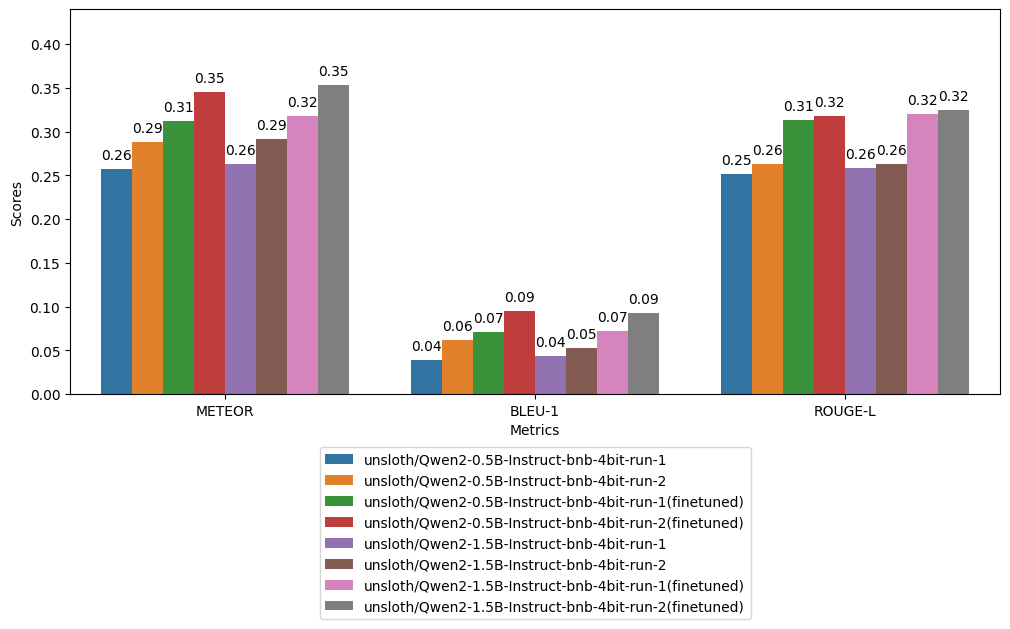

In [40]:
plot_metrics(metrics_df[:-1])

In [36]:
df_v3.to_csv("results/mac-results_exp-2.csv", index=False)

NameError: name 'pd' is not defined